In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

# Reading and plotting the data

In [32]:
data = pd.read_csv('ex1data1.txt', header = None, names=['X', 'y'])
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [33]:
X = np.array(data.X)[:, None]
y = np.array(data.y)
m = len(y)

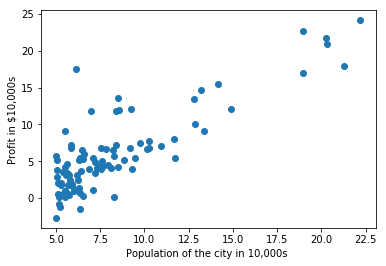

In [34]:
plt.scatter(X, y)
plt.xlabel('Population of the city in 10,000s ')
plt.ylabel('Profit in $10,000s')
plt.show()

# Adding another feature to accomodate the intercept term

In [35]:
ones = ones = np.ones_like(X) #an array of ones of same dimension as x
X = np.hstack((ones, X))

# Computing cost

In [36]:
def computeCost(X, y, theta):
    m = len(y)
    J = np.sum(np.square(np.dot(X, theta) - y)) / (2 * m)
    return J

## Gradient Descent

In [37]:
def gradientDescent(X, y, theta, alpha, iteration):
    m = len(y)
    J_history = np.zeros(iteration)
    
    for i in range(iteration):
        theta = theta - (alpha/m) * np.sum((np.dot(X, theta) - y)[:, None] * X, axis=0)
        J_history[i] = computeCost(X, y, theta)
        if i%100 == 0:
            print('Cost after ', str(i), ' iteration: ', J_history[i])
    return (theta, J_history)

In [38]:
theta = np.zeros(2) # initialize
iterations = 1500
alpha = 0.01
computeCost(X, y, theta)
theta, hist = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent: ')
print(theta[0],"\n", theta[1])

Cost after  0  iteration:  6.737190464870006
Cost after  100  iteration:  5.476362817272741
Cost after  200  iteration:  5.173634551165021
Cost after  300  iteration:  4.962606493117519
Cost after  400  iteration:  4.815501494116686
Cost after  500  iteration:  4.712956453749759
Cost after  600  iteration:  4.6414735988143185
Cost after  700  iteration:  4.591643801766726
Cost after  800  iteration:  4.556908078409751
Cost after  900  iteration:  4.532694243543437
Cost after  1000  iteration:  4.515815084502823
Cost after  1100  iteration:  4.504048835517842
Cost after  1200  iteration:  4.495846731678218
Cost after  1300  iteration:  4.490129148489064
Cost after  1400  iteration:  4.486143493324961
Theta found by gradient descent: 
-3.63029143940436 
 1.166362350335582


# Plotting the linear fit

In [30]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

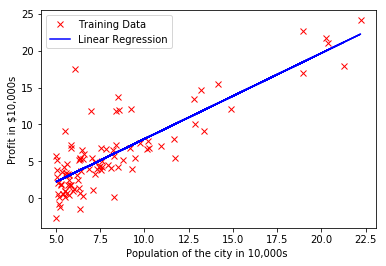

In [49]:
plt.plot(X[:,1], y, 'rx', X[:,1], np.dot(X,theta), 'b-')
plt.legend(['Training Data','Linear Regression'])
plt.xlabel('Population of the city in 10,000s ')
plt.ylabel('Profit in $10,000s')
plt.show()

Predicting values for population of sizes 35,000 and 70,000

In [50]:
predict1 = print('For population of size 35,000 we predict a profit of ',
                 str(np.dot([1,3.5], theta ) * 10000))

For population of size 35,000 we predict a profit of  4519.7678677017675


In [51]:
predict1 = print('For population of size 70,000 we predict a profit of ',
                 str(np.dot([1,7.0], theta ) * 10000))

For population of size 70,000 we predict a profit of  45342.45012944714


# Visualizing J in 3d space

In [52]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i][j] = computeCost(X,y,t)

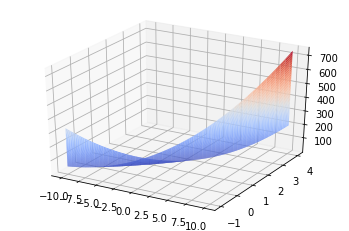

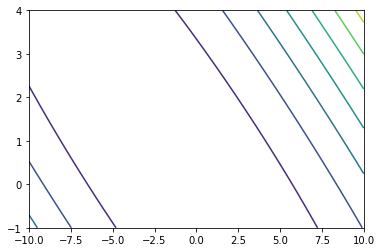

In [53]:
# Surface plot using J_Vals
fig = plt.figure()
ax = plt.subplot(111,projection='3d')
Axes3D.plot_surface(ax,theta0_vals,theta1_vals,J_vals,cmap=cm.coolwarm)
plt.show()
fig = plt.figure()
ax = plt.subplot(111)
plt.contour(theta0_vals,theta1_vals,J_vals) 

# Problem Statement 2

# Linear regression with multiple variables

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
The file ex1data2.txt contains a training set of housing prices in Port- land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

# Loading data 

In [59]:
data = pd.read_csv('ex1data2.txt', header=None, names=['sizes', 'bedrooms', 'price'])
data.head()

,sizes,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [67]:
s = np.array(data.sizes)
r = np.array(data.bedrooms)
p = np.array(data.price)
m = len(r) 
s = np.vstack(s)
r = np.vstack(r)
X = np.hstack((s,r))
print('First 10 examples from the dataset: \n')
print(X[:10])

First 10 examples from the dataset: 

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]]


# Feature Normalization 

In [68]:
mean = np.mean(X, axis=0)
X = X - mean
std = np.std(X, axis=0)
X = X/std

In [70]:
X = np.hstack((np.ones_like(s), X))

# Multiple Dimension gradient desecent

In [86]:
alpha = 0.05
num_iters = 500
theta = np.zeros(3)

In [87]:
theta, hist = gradientDescent(X, p, theta, alpha, num_iters)

Cost after  0  iteration:  59259228917.51687
Cost after  100  iteration:  2061664846.552836
Cost after  200  iteration:  2043473518.0848634
Cost after  300  iteration:  2043282310.504195
Cost after  400  iteration:  2043280077.0095432


# Plotting figure

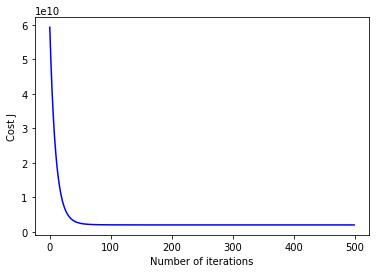

In [88]:
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(np.arange(len(hist)), hist, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [89]:
print('Theta computed from gradient descent: \n')
print(theta,'\n')

Theta computed from gradient descent: 

[340412.65957199 109446.94024209  -6577.49862661] 



# Estimate the price of a 1650 sq-ft, 3 br house

In [90]:
normalized_specs = np.array([1,((1650-s.mean())/s.std()),((3-r.mean())/r.std())])
price = np.dot(normalized_specs,theta) 
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ',
      price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
  293081.6526600925


# Normal Equation Method

In [92]:
def normalEqn(X,y):
    
    return np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))

data = pd.read_csv("ex1data2.txt",names=["sz","bed","price"])
s = np.array(data.sz)
r = np.array(data.bed)
p = np.array(data.price)
m = len(r) 
s = np.vstack(s)
r = np.vstack(r)
X = np.hstack((s,r))
X = np.hstack((np.ones_like(s),X))

theta = normalEqn(X, p)

print('Theta computed from the normal equations: \n')
print(theta)
print('\n')

# Estimate the price of a 1650 sq-ft, 3 br house
price = np.dot([1,1650,3],theta) 


print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): \n',
       price)

Theta computed from the normal equations: 

[89597.9095428    139.21067402 -8738.01911233]


Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 
 293081.46433489694
